<a href="https://colab.research.google.com/github/Shivamgond2022/Projects-1/blob/main/Project(Drug_Data)Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_table("/content/drive/MyDrive/Data set folder/drugsCom_raw.tsv")
data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [ ]:
data.duplicated().value_counts()

False    161297
dtype: int64

In [ ]:
data.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
#data['condition'].dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [ ]:
condition_1 = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
df = data[data['condition'].isin(condition_1)]
df.reset_index(inplace=True)

In [ ]:
# We have Focused only these three condition
df

,index,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10.0,"March 9, 2017",54
1,31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8.0,"May 7, 2011",3
2,44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4.0,"April 27, 2016",3
3,50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10.0,"October 24, 2017",24
4,67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10.0,"June 20, 2013",166
...,...,...,...,...,...,...,...,...
13939,161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4.0,"July 15, 2009",39
13940,161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1.0,"July 18, 2009",25
13941,161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9.0,"October 23, 2015",47
13942,161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2.0,"July 17, 2016",33


In [ ]:
!pip install texthero -q

In [ ]:
! python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import texthero as hero

In [ ]:
df['review'] = hero.clean(df['review'])

<ipython-input-12-1ccb60d640a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = hero.clean(df['review'])


In [ ]:
df.head()

,index,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,11,75612,L-methylfolate,Depression,taken anti depressants years improvement mostl...,10.0,"March 9, 2017",54
1,31,96233,Sertraline,Depression,week zoloft anxiety mood swings take 50mg morn...,8.0,"May 7, 2011",3
2,44,121333,Venlafaxine,Depression,gp started venlafaxine yesterday help depressi...,4.0,"April 27, 2016",3
3,50,156544,Dulaglutide,"Diabetes, Type 2",hey guys months since last post wanted give mo...,10.0,"October 24, 2017",24
4,67,131909,Effexor XR,Depression,medicine saved life wits end anti depressants ...,10.0,"June 20, 2013",166


In [ ]:
three_con = df['condition'].value_counts(ascending = False)
three_con

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

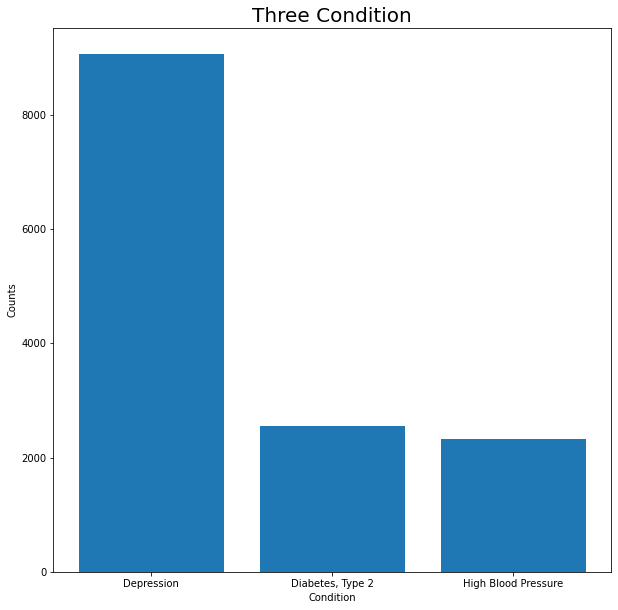

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(three_con.index,three_con.values)
plt.title("Three Condition",fontsize=20)
plt.xlabel("Condition")
plt.ylabel("Counts")
plt.show()

In [ ]:
# Making new column for results on rating 
def Results (x):
  if x['rating'] <= 6:
    return("Negative")
  else:
    return("Positive")

df["Results"] = df.apply(Results, axis=1)


<ipython-input-16-bb303a318b68>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Results"] = df.apply(Results, axis=1)


In [ ]:
df

,index,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Results
0,11,75612,L-methylfolate,Depression,taken anti depressants years improvement mostl...,10.0,"March 9, 2017",54,Positive
1,31,96233,Sertraline,Depression,week zoloft anxiety mood swings take 50mg morn...,8.0,"May 7, 2011",3,Positive
2,44,121333,Venlafaxine,Depression,gp started venlafaxine yesterday help depressi...,4.0,"April 27, 2016",3,Negative
3,50,156544,Dulaglutide,"Diabetes, Type 2",hey guys months since last post wanted give mo...,10.0,"October 24, 2017",24,Positive
4,67,131909,Effexor XR,Depression,medicine saved life wits end anti depressants ...,10.0,"June 20, 2013",166,Positive
...,...,...,...,...,...,...,...,...,...
13939,161251,198130,Metoprolol,High Blood Pressure,fourth blood pressure pill feels like partly w...,4.0,"July 15, 2009",39,Negative
13940,161258,34443,Bystolic,High Blood Pressure,bystolic feet arms numb blood sugars became se...,1.0,"July 18, 2009",25,Negative
13941,161278,86533,Invokana,"Diabetes, Type 2",got diagnosed type doctor prescribed invokana ...,9.0,"October 23, 2015",47,Positive
13942,161286,93069,Vortioxetine,Depression,third med tried anxiety mild depression week h...,2.0,"July 17, 2016",33,Negative


In [ ]:
results = df["Results"].value_counts(ascending=False)
results

Positive    9021
Negative    4923
Name: Results, dtype: int64

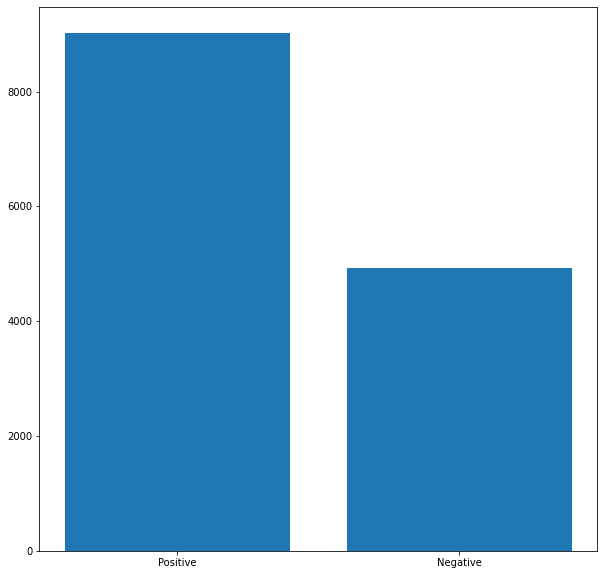

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(results.index,results.values)
plt.show()

As we can see above chart Positive has much higher count then Nigative



#Building model with review inputs to predict this condition

##LogisticRegrationModel

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
# Selecting input and output variabels
x = cv.fit_transform(df['review'])
y = le.fit_transform(df['condition'])

In [ ]:
#x.shape, y.shape

In [ ]:
# Spliting training and testing data for model
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
#x = np.array(x)
#y = np.array(y)

In [ ]:
# Building model
classifer = LogisticRegression()
classifer.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = classifer.predict(x)

In [ ]:
classifer.predict_proba(x)

array([[9.99699989e-01, 8.35994685e-07, 2.99175037e-04],
       [9.99979361e-01, 2.42101832e-06, 1.82182645e-05],
       [9.99603148e-01, 6.80357572e-05, 3.28816547e-04],
       ...,
       [7.07362990e-05, 9.99910908e-01, 1.83558230e-05],
       [9.85158181e-01, 1.06645401e-03, 1.37753649e-02],
       [1.21035771e-03, 1.20540979e-04, 9.98669101e-01]])

In [ ]:
pred = pd.DataFrame({'actual':y, 'predicted':y_pred})
pred

,actual,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
13939,2,2
13940,2,2
13941,1,1
13942,0,0


In [ ]:
lr_score = classifer.score(x,y)
lr_score

0.9945496270797476

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9069
           1       1.00      0.99      0.99      2554
           2       1.00      0.98      0.99      2321

    accuracy                           0.99     13944
   macro avg       1.00      0.99      0.99     13944
weighted avg       0.99      0.99      0.99     13944



In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


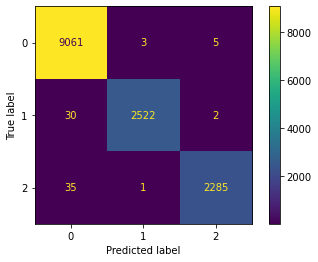

In [ ]:
plot_confusion_matrix(classifer,x,y)
plt.show()

#Building SVM model

In [ ]:
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
svm =LinearSVC(C=0.55, random_state=40)
svm.fit(x,y)

LinearSVC(C=0.55, random_state=40)

In [ ]:
y_ped_svm =  svm.predict(x)

In [ ]:
pred = pd.DataFrame({'acctual':y, 'pred':y_ped_svm})
pred

,acctual,pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
13939,2,2
13940,2,2
13941,1,1
13942,0,0


In [ ]:
svm_score = svm.score(x,y)
svm_score

0.9969879518072289

In [ ]:
print(classification_report(y,y_ped_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9069
           1       1.00      0.99      1.00      2554
           2       1.00      0.99      1.00      2321

    accuracy                           1.00     13944
   macro avg       1.00      0.99      1.00     13944
weighted avg       1.00      1.00      1.00     13944



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x720 with 0 Axes>

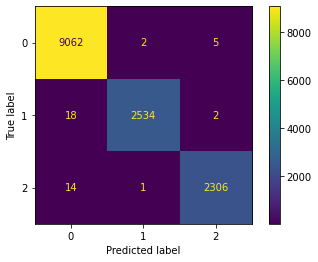

In [ ]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(svm,x,y)
plt.show()

##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
decision = tree.fit(x,y)

In [ ]:
y_tree_pred = tree.predict(x)

In [ ]:
tree.predict_proba(x)

array([[0.9929594 , 0.00234687, 0.00469373],
       [0.63269725, 0.2318311 , 0.13547165],
       [0.9929594 , 0.00234687, 0.00469373],
       ...,
       [0.63269725, 0.2318311 , 0.13547165],
       [0.9929594 , 0.00234687, 0.00469373],
       [0.63269725, 0.2318311 , 0.13547165]])

In [ ]:
pred = pd.DataFrame({"acctual":y, "pred":y_tree_pred})
pred

,acctual,pred
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
13939,2,2
13940,2,2
13941,1,0
13942,0,0


In [ ]:
tree_score = tree.score(x,y)
tree_score

0.7912363740676994

In [ ]:
print(classification_report(y,y_tree_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      9069
           1       0.96      0.31      0.47      2554
           2       0.91      0.55      0.68      2321

    accuracy                           0.79     13944
   macro avg       0.88      0.62      0.67     13944
weighted avg       0.83      0.79      0.76     13944



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


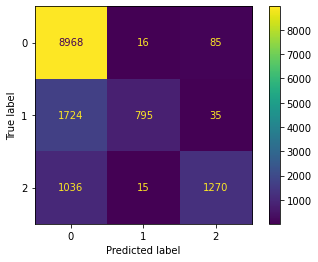

In [ ]:
plot_confusion_matrix(tree,x,y)

## XGBM

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
model_xgb = xgb.fit(x,y)

In [ ]:
y_pred_xgb = model_xgb.predict(x)

In [ ]:
xgb_score = model_xgb.score(x,y)
print('Accuracy:{:.2f}'.format(xgb_score))

Accuracy:0.92


In [ ]:
pred = pd.DataFrame({"actual":y, "pred":y_pred_xgb})
pred

,actual,pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
13939,2,2
13940,2,2
13941,1,1
13942,0,0


In [ ]:
print(classification_report(y,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      9069
           1       0.99      0.82      0.90      2554
           2       0.97      0.77      0.85      2321

    accuracy                           0.92     13944
   macro avg       0.95      0.86      0.90     13944
weighted avg       0.93      0.92      0.92     13944



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


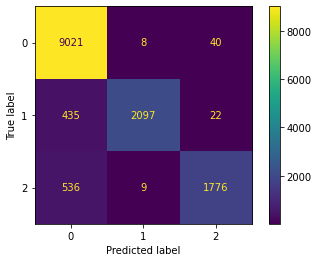

In [ ]:
plot_confusion_matrix(model_xgb,x,y)
plt.show()

#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)

In [ ]:
rfc_model = rfc.fit(x,y)
rfc_model

RandomForestClassifier(max_depth=3)

In [ ]:
y_rfc_pred = rfc_model.predict(x)
y_rfc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pred = pd.DataFrame({"Acurate":y, "Pred":y_rfc_pred})
pred

,Acurate,Pred
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
13939,2,0
13940,2,0
13941,1,0
13942,0,0


In [ ]:
rfc_score = rfc_model.score(x,y)
rfc_score

0.6503872633390706

In [ ]:
print(classification_report(y,y_rfc_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      9069
           1       0.00      0.00      0.00      2554
           2       0.00      0.00      0.00      2321

    accuracy                           0.65     13944
   macro avg       0.22      0.33      0.26     13944
weighted avg       0.42      0.65      0.51     13944



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


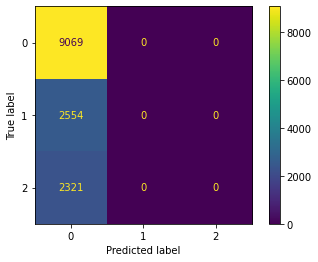

In [ ]:
plot_confusion_matrix(rfc_model,x,y)
plt.show()

#Naive Method

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
x = x.toarray()
nb = GaussianNB()
nb_model = nb.fit(x,y)
nb_model

GaussianNB()

In [ ]:
y_pred_nb = nb_model.predict(x)
y_pred_nb

array([0, 0, 0, ..., 1, 1, 2])

In [ ]:
pred = pd.DataFrame({"Actual":y, "Pred":y_pred_nb})
pred

,Actual,Pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
13939,2,2
13940,2,2
13941,1,1
13942,0,1


In [ ]:
nb_score = nb_model.score(x,y)
nb_score

0.8947217441193345

In [ ]:
print(classification_report(y,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      9069
           1       0.75      0.99      0.85      2554
           2       0.77      0.90      0.83      2321

    accuracy                           0.89     13944
   macro avg       0.84      0.92      0.87     13944
weighted avg       0.92      0.89      0.90     13944



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


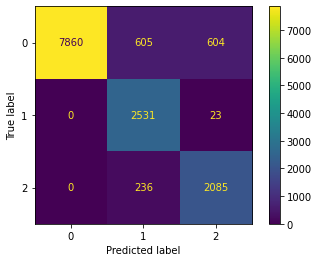

In [ ]:
plot_confusion_matrix(nb_model,x,y)
plt.show()

**Finel Result DataFrame**

In [ ]:
results = pd.DataFrame({"Models":["LogisticRegrasion",
                                 "SVM", "DecisionTree",
                                  "XGBoost", "RFC", "NaiveBayes"],
                        "Results":[lr_score, svm_score,
                                   tree_score,xgb_score, rfc_score, nb_score]})
results

,Models,Results
0,LogisticRegrasion,0.994550
1,SVM,0.996988
2,DecisionTree,0.791236
3,XGBoost,0.924699
4,RFC,0.650387
5,NaiveBayes,0.894722
